In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("spam_ham_dataset.csv")
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


**data**.shape

In [7]:
data.shape

(5171, 4)

In [8]:
data['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [14]:
data['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [11]:
import seaborn as sns

<Axes: xlabel='count', ylabel='label'>

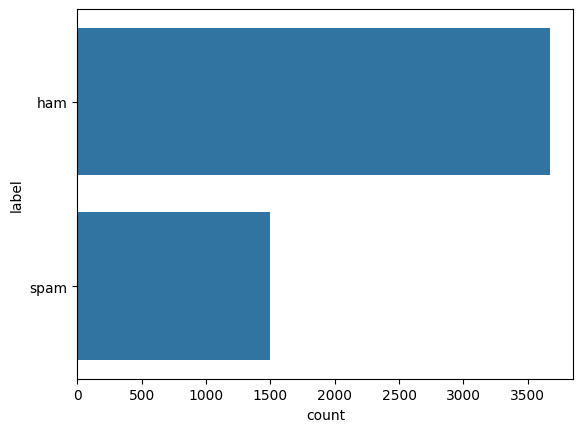

In [16]:
sns.countplot(data['label'])

In [19]:
x=data['text'].values
y=data['label_num'].values

In [22]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
X_train.shape

(4136,)

In [26]:
X_test.shape

(1035,)

In [27]:
y_train.shape

(4136,)

In [28]:
y_test.shape

(1035,)

## **Preprocessing**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv=CountVectorizer()  #converting a collection of text documents into a numerical representation

# **Training by ML Algorithm**

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb=MultinomialNB()

In [33]:
pipe=make_pipeline(cv,nb)

In [34]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [35]:
y_pred=pipe.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9729468599033816

In [37]:
email=['Hey i am Elon Musk.Get a brand new car from tesla']
pipe.predict(email)

array([1])

In [38]:
import pickle

In [39]:
pickle.dump(pipe,open("Naive_model.pkl",'wb'))